In [1]:
using DifferentialEquations
using ParameterizedFunctions

type SSNParam
    w
    h
    τ
    V_rest
    k
    n
end

ReLU(x) = x < 0.0 ? 0.0 : x

function ssn_ode(t, u, param, du)
    w = param.w
    h = param.h
    τ = param.τ
    V_rest = param.V_rest
    n = param.n
    k = param.k
    du .= ((- u .+ -V_rest) .+ w * (k .* ReLU.(u .- V_rest).^n) .+ h) ./ τ
end

ssn_ode (generic function with 1 method)

In [2]:
w = [1 -3
     1 -1]

2×2 Array{Int64,2}:
 1  -3
 1  -1

In [3]:
τ = [1, 0.1]

2-element Array{Float64,1}:
 1.0
 0.1

In [4]:
h = [0.1, 0.1]

2-element Array{Float64,1}:
 0.1
 0.1

In [5]:
ssn = ParameterizedFunction(ssn_ode, SSNParam(
    w,
    τ,
    h,
    -70,   # V_rest
    0.01,  # k
    2.2,   # n
))

(::ParameterizedFunction) (generic function with 2 methods)

In [6]:
ode = ODEProblem(ssn, ones(2), (0.0, 5.0))

DiffEqBase.ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: [1.0, 1.0]

In [7]:
sol = solve(ode);

In [8]:
using Plots


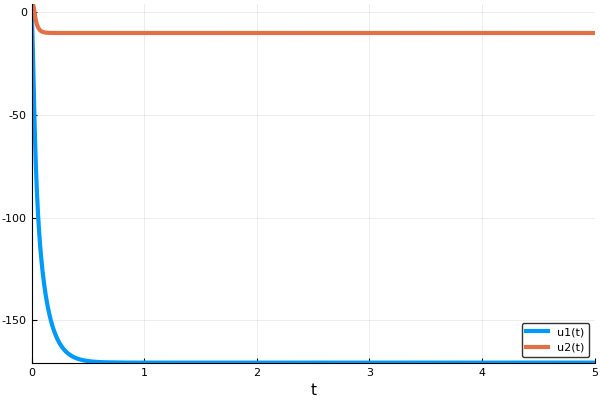

In [9]:
plot(sol, vars=[1, 2])

In [ ]:
workspace() 